### Machine Learning Practicum Analysis

##### Author: Jessica Khaskheli


##### Contributors: None

##### Date: March 15, 2022

##### Problem Description:
In this machine learning practicum, I will be using various supervised and unsupervised machine learning models to evaluate their classification performances when classifying disease type given different health characteristics as features. In the second half of the practicum, I will be modeling how the prevalence of hate crimes in the US have changed before and after the 2016 election. I will use KMeans clustering to analyze this question.

In [72]:
# reading in packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# import derm data
derm = pd.read_csv("dermatology.csv", delimiter = '\t')

In [15]:
# dropping rows with ? as an entry
# 8 rows are being dropped from df
derm.drop(derm.index[derm['Age'] == '?'], inplace = True)

In [16]:
# creating features and labels, training/testing split 80/20

# creating features and labels 
features_derm = derm.drop("Disease", axis = 1)
labels_derm = derm["Disease"]

# creating 80/20 train and test split
X_train, X_test, y_train, y_test = train_test_split(features_derm, labels_derm, test_size = 0.2)

## Part 1:

## Model 1: Gradient Descent: Type of Disease from Patient's age

In [17]:
# creating features and labels for gradient descent model
features_gd = derm["Age"].array.reshape(-1, 1)
labels_gd = derm["Disease"]

# test and training split 80/20
X_train, X_test, y_train, y_test = train_test_split(features_gd, labels_gd, test_size = 0.2)

Text(0.5, 1.0, 'Disease Type as a Function of Age')

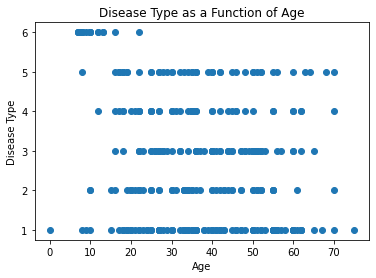

In [18]:
# plotting Age with respect to Disease Type
plt.scatter(features_gd, labels_gd)
plt.xlabel("Age")
plt.ylabel("Disease Type")
plt.title("Disease Type as a Function of Age")

In [19]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

gd = make_pipeline(StandardScaler(), 
                  SGDRegressor(max_iter=10000, tol = 1e-6, eta0 = 0.0001, alpha = 0.000008))
gd.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(alpha=8e-06, eta0=0.0001, max_iter=10000,
                              tol=1e-06))])

In [20]:
# making prediction from X_test values
gd_pred = gd.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


print(r2_score(y_test, gd_pred))
print(mean_squared_error(y_test, gd_pred))

0.0151031037826872
2.2790939751201553


## Analysis: 

In building my regression model using gradient descent, I went with SGDRegressor to predict disease type given a certain age. I plotted the Disease Type with respect to Age before building my model to identify any patterns visually. I found that the data was non-linear, meaning no linear correlation between the two variables was identified. Therefore, I expected that building a linear regression model with gradient descent wouldn't give me a high R2 score since my data is non-linear; in other words, my model would probably not be a good fit for the data. 

How gradient descent method works:

Implementing a gradient descent to build my linear regression model means that we approximate the optimum values for the slope and y-intercept using partial derivatives. These partial dervatives are taken of something called a Cost Function. This is an error function derived from the linear equation. Taking the partial derivative of this equation is meant to minimize the error in order to finally produce those optimum slope and y-intercept values for the line that best fits the data. A list of coefficients are produced, either positive or negative, which indicate the direction of the gradient and give information on which direction the gradient should move next in order to get as close to the trend of the actual data as possible. 

Building my model:

In the case of this data, the data is spread across the range of Age values across the x-axis and is not in a linear format, therefore, a linear trend line wouldn't make sense in describing the data. 

When building my model, I found that SGDRegressor was the best to use instead of SGDClassifier because we're trying to predict the Disease type given an Age instead of classify the Disease type based on a specific Age. And Age is a continuous variable so it makes more sense to use SGDRegressor. 

My chosen parameters: 

With regards to my parameters, I found that having a very small tolerance value, like 1e-6, was what I needed to obtain a non-negative R2 score. Since R2 scores taken on values from 0 to 1, having a negative R2 score meant that my line was going in the opposite direction of the trend of my data and wasn't fitting to it well. I also found that having a low alpha value of 0.000008 kept my R2 score positive, although the changing tolerance value had the most impact on improving it. Additionally, the default number for max_iter is 1000 and increasing this to a magnitude larger didn't have much of an effect on how well my model was fitting the data. The highest R2 score I could obtain is 0.11.

To reiterate, given that the data doesn't follow a linear relationship explains why my model performed poorly. I didn't bother retrieving the optimum slope and y-intercept from my linear regression model because I didn't think it would be informative enough when plotted on top of my data.

## Model 2: Random Forest

In [22]:
# creating features and labels, training/testing split 70/30
from sklearn.model_selection import train_test_split

# creating features and labels 
features_derm = derm.drop("Disease", axis = 1)
labels_derm = derm["Disease"]

# creating 80/20 train and test split
X_train, X_test, y_train, y_test = train_test_split(features_derm, labels_derm, test_size = 0.3)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

randforest = RandomForestClassifier(n_estimators = 5, criterion = "entropy", max_leaf_nodes = 7)
randforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=7, n_estimators=5)

In [24]:
# predicting y_test values using X_test for Random Forest

randforest_pred = randforest.predict(X_test)
pred_xtrain = randforest.predict(X_train)

In [25]:
print(accuracy_score(y_test, randforest_pred))

0.9444444444444444


Text(0.5, 1.0, 'Training and Testing MSE values')

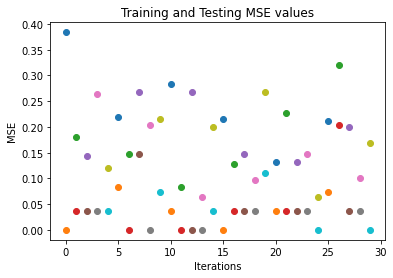

In [26]:
for iter in range(30):
    randforest.fit(X_train, y_train)
    y_train_pred = randforest.predict(X_train)
    y_test_pred = randforest.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    #print("Iteration: {} Train MSE: {} Test MSE: {}".format(iter, mse_train, mse_test))
    randforest.n_estimators += 1
    
    plt.scatter(iter, mse_train), plt.scatter(iter, mse_test)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.title("Training and Testing MSE values")

## Analysis:

When building my Random Forest, I found that only defining the n_estimators parameters caused me to have a very high accuracy score. This led me to suspect overfitting. I added the criterion parameter and defined is with 'entropy' in order to ensure that the split is chosen with features that reduce the amount of messiness/disorder. I then added the max_leaf_nodes parameter for which I chose 7 as the value. I found that 7 allowed the accuracy score to not take such high values, which I thought meant that the overfitting issue was resolved. 

I also calculated the MSE for the test and training data, iterated through the the prediction calculations for y_test and y_train and then plotted them to make sure that the MSE for my test model wasn't declining rapidly. In my plot, the points at the bottom, ranging near 0.2, are my MSE values for my training model, while the points above 0.2, that include the darker red and orange colors, are my MSE values for my testing model. 

I concluded that my Random Forest model is probably not overfitting and with the parameters I chose above, I obtained an accuracy score of about 0.95.

## Model 3: kNN

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# creating features and labels 
features_knn = derm.drop("Disease", axis = 1)
labels_knn = derm["Disease"]

# creating 80/20 train and test split
X_train, X_test, y_train, y_test = train_test_split(features_knn, labels_knn, random_state = 1, test_size = 0.2)

In [28]:
# calling and fitting the kNN model
knn_derm = KNeighborsClassifier(n_neighbors = 3) # picking k value
knn_derm.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
# predicting y_test values from X_test
derm_pred = knn_derm.predict(X_test)

In [30]:
# calculating accuracy scores
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, derm_pred))
print(confusion_matrix(y_test, derm_pred))


0.8888888888888888
[[23  0  0  0  0  1]
 [ 0  5  0  1  0  0]
 [ 0  0 18  0  0  0]
 [ 0  2  0  4  0  0]
 [ 0  3  0  1  9  0]
 [ 0  0  0  0  0  5]]


In [31]:
x = np.array([])
y = np.array([])

for k in range(2, 30):
    knn_derm = KNeighborsClassifier(n_neighbors = k)
    knn_derm.fit(X_train, y_train)
    derm_pred = knn_derm.predict(X_test)
    y = np.append(y, accuracy_score(y_test, derm_pred))
    x = np.append(x, k)
    # print(k)
    # print(accuracy_score(y_test, derm_pred))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


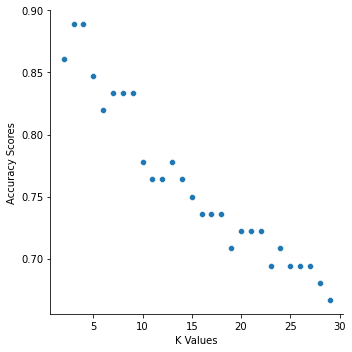

In [34]:
# plotting accuracy scores with respect to k values
import matplotlib.pyplot as plt
import seaborn as sns
p = sns.relplot(x, y)
p.set_axis_labels("K Values", "Accuracy Scores")

## Analysis: 

When building my kNN model to classify the Disease type, I found that k = 3 produced the highest accuracy score amongst the other values k could take on. I continued to split my data by a 80/20 split to provide just enough data to be used for testing. 

The confusion matrix I produced shows that most variables were classified correctly as shown along the diagonal, and very limited variables were classified falsley with this model. 

Additionally, I plottd the Accuracy scores with respect to the varying k-values and found that the accuracy of my kNN model declines almost linearly after the value of k surpasses 5. I obtained an accuracy score of about 0.90 when the k value was 3.

## Model 4: SVMs

In [35]:
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

kernel = ['kernel', 'sigmoid', 'rbf']
C = [1, 10, 100, 1000]
gamma = ['scale']
svc = SVC()
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
gridcv_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
svm_result = gridcv_search.fit(X_train, y_train)

import warnings
warnings.filterwarnings("ignore")

# printing largest accuracy score I could get
print("Best parameters: %f using %s" % (svm_result.best_score_, svm_result.best_params_))


Best parameters: 0.954532 using {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/Library/Frameworks/Python.framework

## Analysis:

When building my SVM model, I struggled with obtaining a high accuracy score when I defined the kernel as kernel = ['kernel', 'sigmoid', 'gamma', 'scale']. Including 'rbf' as a method for my kernel really increased the accuracy of model. My model's accuracy score jumped from 0.2 to about 0.9 once I included 'rbf'. The 'rbf' kernel works similarly to how kNN works in order to accomodate for the space complexity and separate the points easier. I also think that 'rbf' worked very well because it's meant for data that is non-linear.

I used GridSearchCV() in order to print out a list of the best hyperparamters to use for my SVM model and found that C = 100, kernel = 'rbf' and gamma = 'scale' produced a high accuracy score for my model, which turned out to be around 0.95.

## Model 5: Neural Networks

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler_function = StandardScaler()
X_trainscaled =scaler_function.fit_transform(X_train)
X_testscaled = scaler_function.transform(X_test)

In [37]:
# calling model and fitting the model

mlp = MLPClassifier(solver = 'sgd', alpha = 0.01, 
                   hidden_layer_sizes = (30, 30, 30, 30), activation = 'relu', random_state = 0, max_iter = 100).fit(X_trainscaled, y_train)

In [38]:
mlp_pred = mlp.predict(X_testscaled)

In [39]:
# printing accuracy score for MLP model
print(accuracy_score(y_test, mlp_pred))

0.8472222222222222


In [40]:
features_test = mlp.score(X_testscaled, y_test)
features_train = mlp.score(X_trainscaled, y_train)

features_test
features_train

0.8706293706293706

[Text(0.5, 1.0, 'Confusion Matrix for MLP Model')]

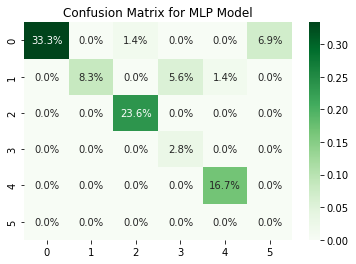

In [41]:
# producing confusion matrix for MLP model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

# plotting confusion matrix for multilabel data 
cm = confusion_matrix(mlp_pred, y_test) # produces confusion matrix with TP, FP, TN, FN


# displaying percentages of data represented in each box
h = sns.heatmap(cm/np.sum(cm).reshape(-1,1), annot=True, 
            fmt='.1%', cmap='Greens')

h.set(title = "Confusion Matrix for MLP Model")

## Analysis: 

When I built my MLP model, having the solver be 'lbfgs' caused my accuracy score to be very high, around 0.98. I checked the accuracy score of my training model and it was 1.0, so I suspected that some overfitting was occurring. Instead, I switched to using 'sgd' for my solver and 'relu' for my activation because I thought this would give me more optimum prediction values. With multiple guess and check attempts, I ended up setting my hidden layer sizes to: (30, 30, 30, 30) and reached an accuracy score of 0.85. 

Throughout this process, the reason I tried many different parameter inputs for solver, activation, hidden_layer_sizes, and random_state is because the accuracy score for my testing model continued to be larger than the accuracy score for my training model which is a key sign that my model is overfitted.

The accuracy score for my training model finally became larger than the accuracy score for my testing model after the hidden_layer_sizes were changed to (30, 30, 30, 30). The accuracy score ended up being around 0.85 while the accuracy score for the training model ended up being about 0.87, which is only slightly higher.

With the confusion matrix I created, you can easily see the percentage of data represented within each box, where most of the data was predicted correctly, and 13% of the data in total was predicted falsely. This confusion matrix does not given information on how much the model was overfitting, but I believe I managed to fix that issues with changing my parameters around.

## Comparing and Contrasting my Models:

To compare the models I built in part 1, Random Forest, kNN, SVM and Neural Networks all produced accuracy scores at about 90%, and through playing with different parameters, I was able to improve these models tremendously. The linear regression model through using gradient descent did not end up being an accurate model or a good fit for the data because I only used Age and Disease Type, which had a non-linear relationship. I would say that kNN was the easiest model to use in terms of high accuracy and the least amount of trouble when trying to improve accuracy.

## Part 2: Analyzing Hate crime incidents before and after the 2016 election

In this section of the practicum, I will be analyzing a few dimensions that may result in an increased number of hate crimes to occur in the US. This analysis will involve two datasets, the SPLC dataset that includes hate crimes that occurred before the 2016 election and the FBI dataset that contains information about the number of hate crimes that occurred after the 2016 election.

### (1) Income Inequality in relation to Hate Crime Incidents

In [42]:
hatecrime = pd.read_csv("hatecrime.csv")

In [43]:
# Using interpolation to fill in the NaN entries
hatecrime = hatecrime.interpolate(method = "pad", limit = 2)

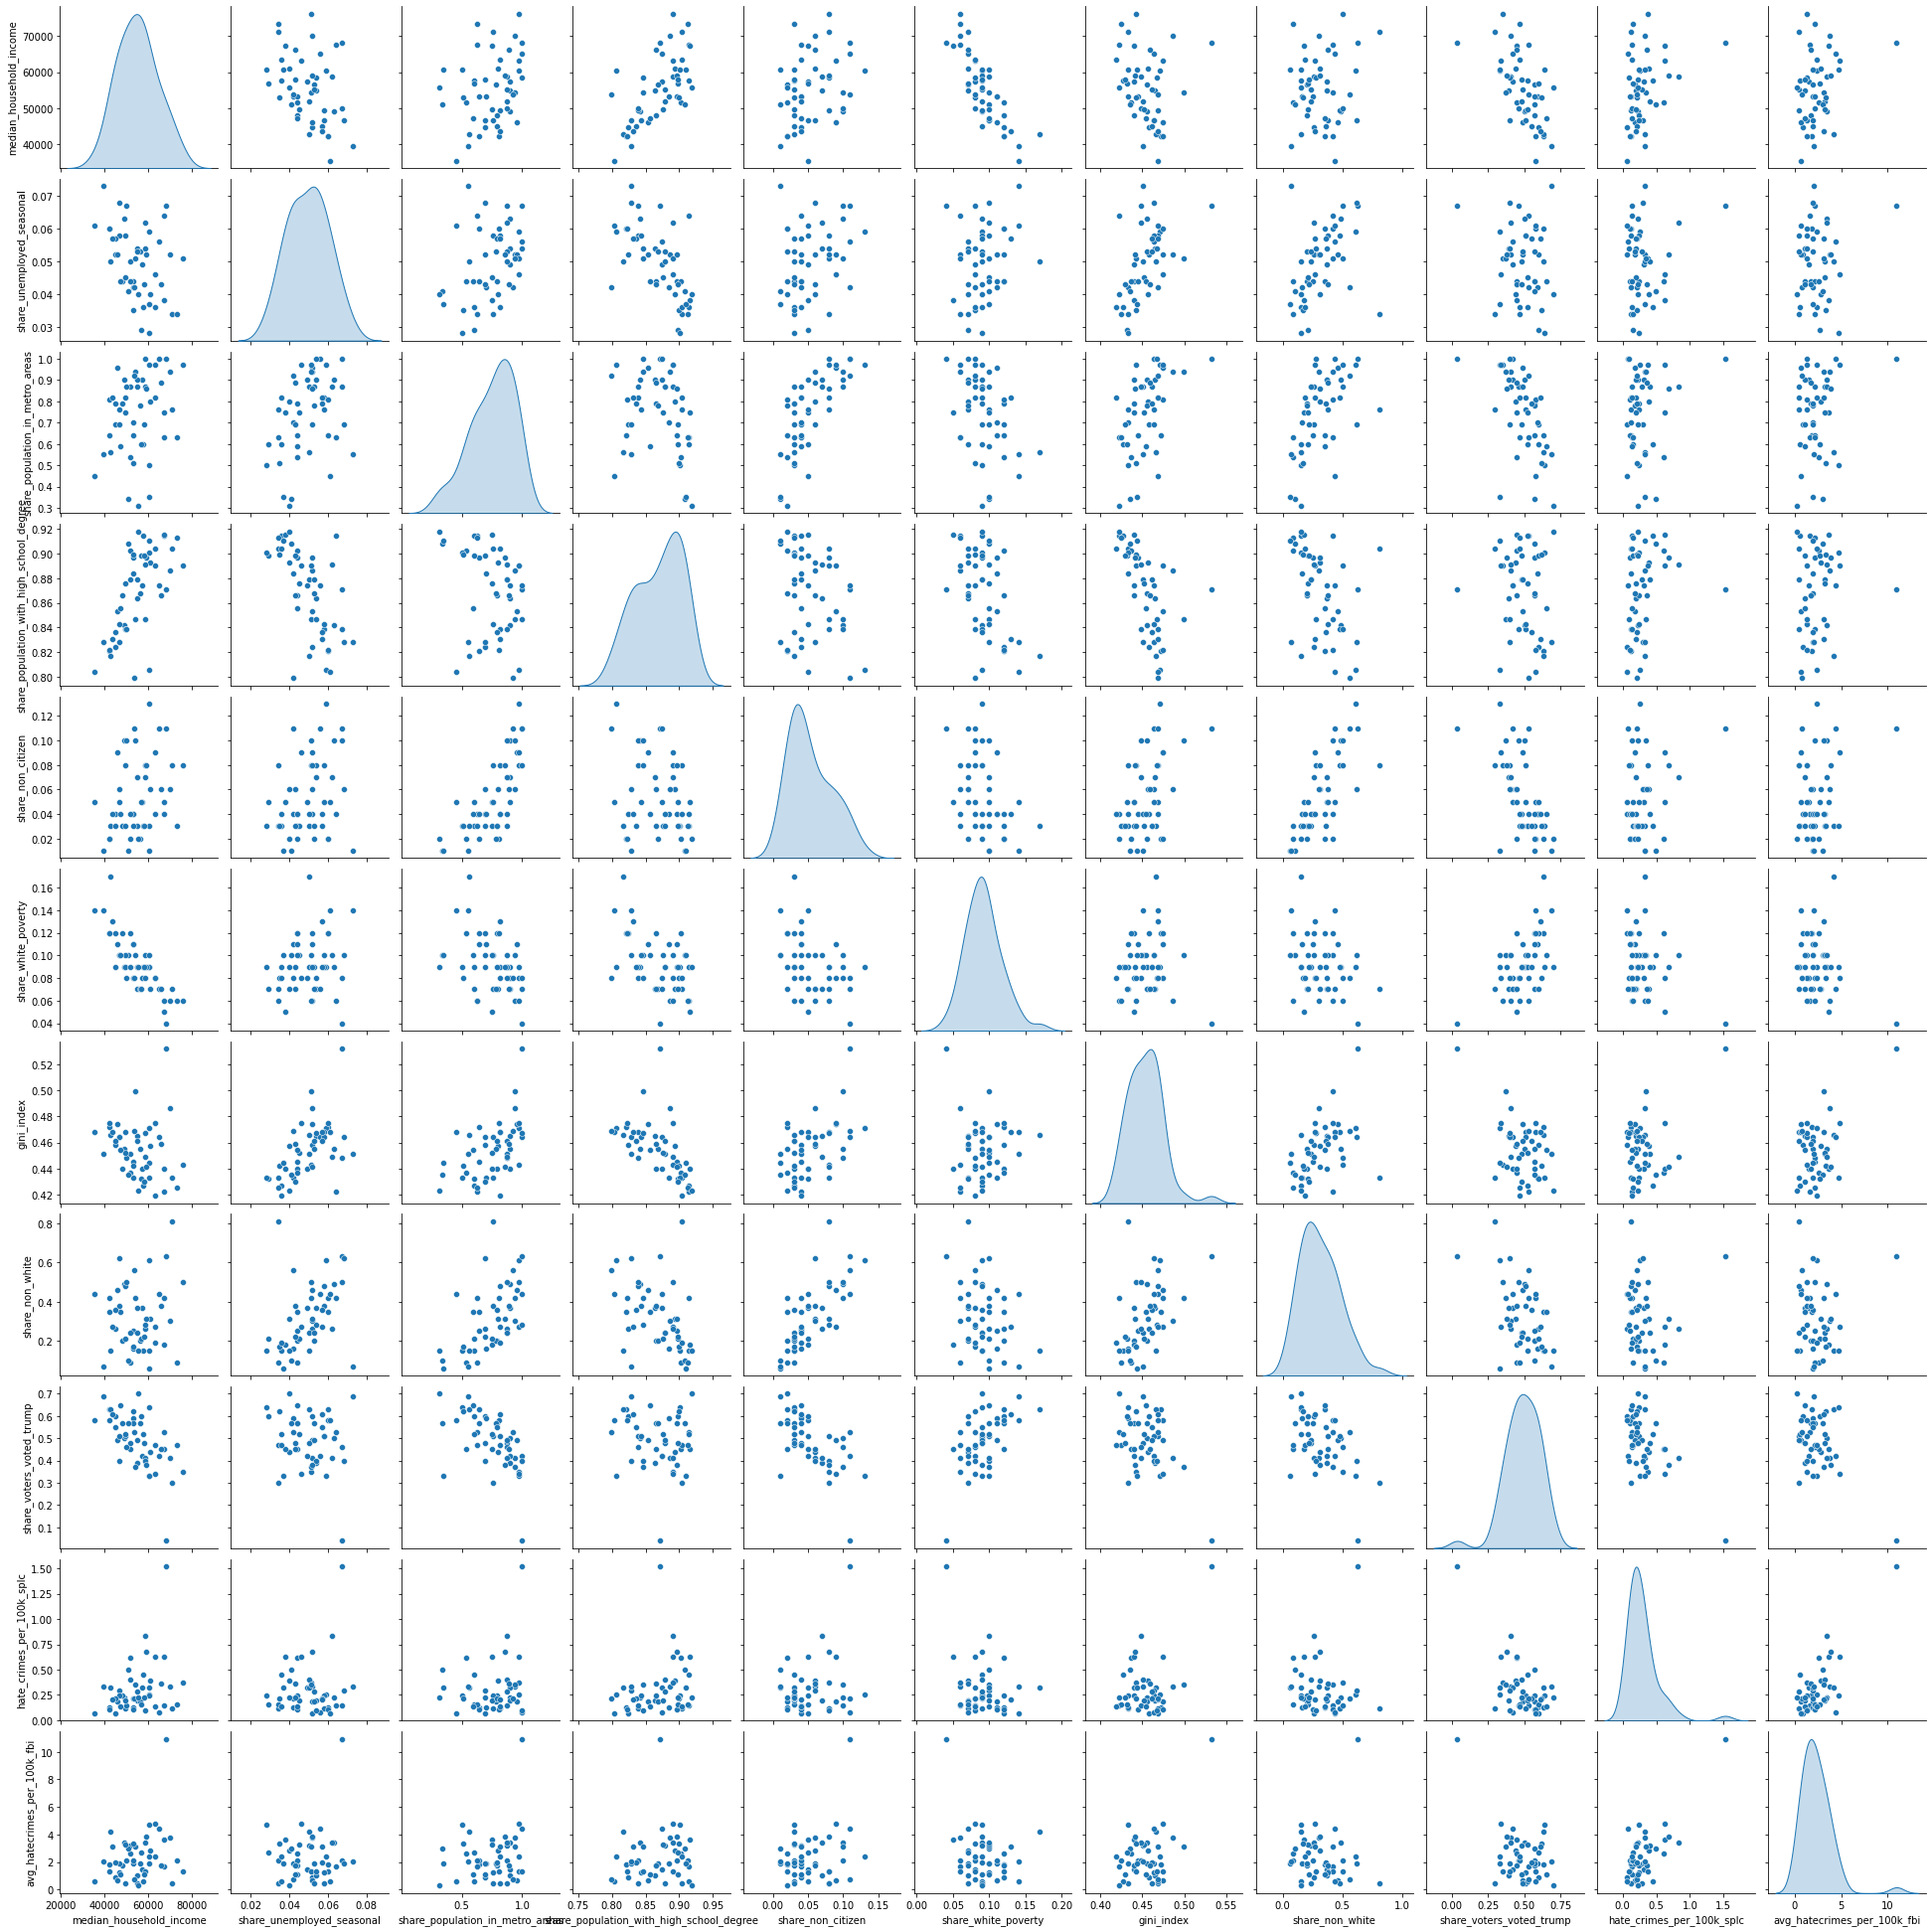

In [44]:
import seaborn as sns

sns.pairplot(data=hatecrime, diag_kind='kde')

In my intial exploration of this hate crimes dataset, I implemented a pairplot using seaborn in order to see which variables have a nontrival correlation with each other. This is done as a preliminary method of feature selection.

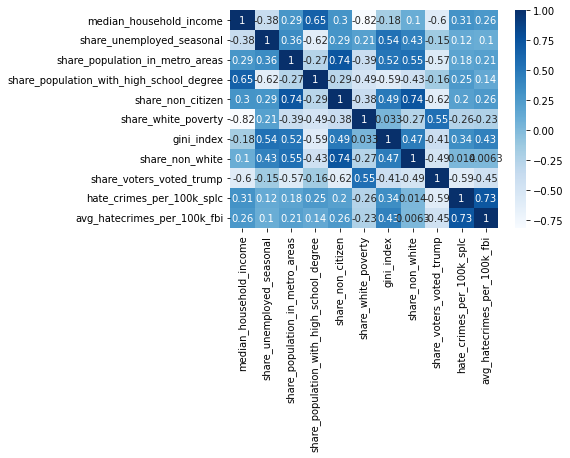

In [45]:
# Plotting Corr Plot to see correlation coefficients between all variables
import seaborn as sns
# corr plot
%matplotlib inline
cor = hatecrime.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

Through my exploratory data analysis process, I also implemented a heatmap so that I could look at the correlation coefficients between each variable to better understand their strengths.

In [46]:
# creating features and labels for SPLC and FBI column to determine income inequality
# including all of the variables besides the hate crime columns as my features to use for
#feature selection

features = hatecrime.drop("hate_crimes_per_100k_splc", axis = 1).drop("avg_hatecrimes_per_100k_fbi", axis = 1).drop("state", axis = 1)
labels_splr = hatecrime["hate_crimes_per_100k_splc"]
label_fbi = hatecrime["avg_hatecrimes_per_100k_fbi"]

In [47]:
# Using RFE method for feature selection to determine best variables to use
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# drop the 1 column in X
RFE_regressor = LinearRegression()

# calling RFE model
rfe = RFE(RFE_regressor)

#Transforming data with RFE
X_rfe = rfe.fit_transform(features, label_fbi)  

#Fitting data to model
RFE_regressor.fit(features, label_fbi)
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True False  True False False]
[6 1 4 1 1 5 1 2 3]


### Creating separate model for SPLR column to determine income inequality 

In [48]:
# creating test and training split for SPLC / income inequality
# using variables that scored a 1 as my features 

features_crime = hatecrime[["share_unemployed_seasonal", "share_population_with_high_school_degree", "share_white_poverty", "median_household_income", "gini_index", "share_voters_voted_trump"]]
labels_splr = hatecrime["hate_crimes_per_100k_splc"]

In [49]:
# train and test split for SPLC / income inequality 
X_train, X_test, y_train, y_test = train_test_split(features_crime, labels_splr, random_state = 1, test_size = 0.1)


In [50]:
# calling and fitting LR model for SPLC variable
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
# predicting y_test values from X_test
lr_pred = lr.predict(X_test)

In [52]:
# calculating R2 score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test, lr_pred)

print(score)
print(mean_squared_error(y_test, lr_pred))

0.5164795868650136
0.007178459314528318


### Creating separate model for FBI column to determine income inequality 

In [53]:
# creating test and training split for FBI column + income inequality

features_fbi = hatecrime[["median_household_income", "share_non_citizen", "share_population_in_metro_areas"]]
label_fbi = hatecrime["avg_hatecrimes_per_100k_fbi"]

In [54]:
# creating test and training 90/10 split
X_train, X_test, y_train, y_test = train_test_split(features_fbi, label_fbi, random_state = 1, test_size = 0.2)

In [55]:
# calling and fitting LR model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [56]:
# printing R2 score for model that uses FBI column as its label
score=r2_score(y_test, lr_pred)

print(score)
print(mean_squared_error(y_test, lr_pred))

0.25951998459167713
1.1024706900748968


## Analysis for Income Inequality's effect of Hate Crimes:

I created separate variables for "hate_crimes_per_100k_splc" and "avg_hatecrimes_per_100k_fbi" and created linear regression models for both. I used a combination of Recursive Feature Elimination and guess and check to improve my R2 scores for both models. 

##### My process:
I created a correlation plot for every variable in the data set to begin with so that I could see which ones had a more or less positive relationship with either of the hate crime data (FBI or SPLC). I also created a heatmap of which includes the same relationships but with correlation coefficients so that I could have a better understand of how strong the relationships were before selecting my features. 

RFE (Recursive Feature Selection) allowed me to have a good starting point with which features to include in my models. I found that features that had a negative correlation coefficient significantly decreased my models' R2 scores.

For the "hate_crimes_per_100k_splc" column as my label, I found that features like: population of those that are unemployed, share of the population with a high school degree, population that voted for trump, gini index, median household income and the share of white population in poverty were features that produced the highest R2 score and lowest MSE. I used a training and testing split of 90/10 for this model because I found that a smaller pool for testing would result in a higher R2 score in this specific case. The highest R2 score I could obtain was about 0.52.

For the "avg_hatecrimes_per_100k_fbi" column as my label, I found that features like: median household income, population that is not a citizen, and population living in metropolitan areas. I used a training and testing split of 80/20 and I found that these parameters significantly improved my R2 score, however, it was still very low. 

After performing RFE for both hate crime data, I found that variables that were identified as having a strong correlation, may have had a negative correlation coefficient in my heatmap. Futhermore, including these variables as my features in my linear regression models caused my R2 score to decrease. This makes me wonder if features with negative correlation coefficients would have a statistically significant effect on the label but cause the R2 score to be negative which may lead to incorrect interpretation. This happened often during this process, and I excluded these variables from my model in order to maintain a positive R2 score since I expect it to take on a value from 0 to 1. The highest R2 score I could produce for this model was about 0.26 which is fairly low given that an R2 score of 0.5 tells us that the variation in the dependent variable by the independent variable is random.


## (2) Predicting number of hate crimes from Nature of population

Now I will choose features from our hate crime datasets to build a model that is able to predict the prevalence of hate crimes accurately. I will consider an accuracy score of 85% or above as a strong regression model.

In [57]:
# nature of population using FBI column
features_nature = hatecrime[["share_non_white", "share_population_in_metro_areas", "share_non_citizen", "share_population_with_high_school_degree", "share_unemployed_seasonal"]]

labels_nature = hatecrime["avg_hatecrimes_per_100k_fbi"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features_nature, labels_nature, random_state = 1, test_size = 0.3)

In [59]:
from sklearn.linear_model import LinearRegression
# calling and fitting LR model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_test, lr_pred)

print(score)
print(mean_squared_error(y_test, lr_pred))

0.40575704475967533
0.9632154318169168


In [61]:
# nature of population using SPLC column
features_naturesplc = hatecrime[["gini_index", "share_population_with_high_school_degree", "share_population_in_metro_areas"]]

labels_splc = hatecrime["hate_crimes_per_100k_splc"]

In [62]:
# train/test split nature of pop and SPLC
X_train, X_test, y_train, y_test = train_test_split(features_naturesplc, labels_splc, random_state = 1, test_size = 0.1)


In [63]:
# LR model nature of pop and SPLC
lr_splc = LinearRegression()
lr_splc.fit(X_train, y_train)

# prediction for nature of pop and SPLC data
lr_splc_pred = lr_splc.predict(X_test)

In [64]:
# printing out R2 score

score_splc_nature =r2_score(y_test, lr_splc_pred)

print(score_splc_nature)
print(mean_squared_error(y_test, lr_splc_pred))

0.5174973467554363
0.007163349408582488


## Analysis:

Similarly to my process for the first part of this problem, I used the RFE method and my heatmap to determine which variables relating to "nature of the population" would have the strong relationship to hate crime data. For the "avg_hatecrimes_per_100k_fbi" data, I found that features regarding: high school graduation status, white population in poverty, population living in metropolitan areas, share of population that is not a citizen, and population of umemployed folks caused my model to have the highest R2 score of about 0.41. 

For the "hate_crimes_per_100k_splc" data, features that had a significant impact on the R2 score of the model were: gini index, population of high school graduates, and share of population living in metropolitan areas. I managed to get a R2 score of 0.52 when I used a 90/10. This was a jump from a R2 score of 0.12 when I had a 80/20 split for my test and training data. 

Some of the variables that I would've included as features are: population of white individuals in living in poverty and population of those that voted for trump because I thought these would have a statistically significant affect on the increase in number of hate crimes after the 2016 election. However, I didn't end up including them in my model because they significantly lowered my R2 score and raised my MSE for both models. However, when refering to the heatmap, I noticed that most features had a correlation coefficient of less than 0.4 with both of the hate crime data columns, therefore, it makes sense why including them in my model would decrease the R2 scores.

This process what very iterative for both (1) and (2) of this problem. I keep exchanging and substituting different features into the models, changing the train/test splits, changing the random_state, and recalculating the R2 scores for both the test and training models in order to produce the best possible model. 

I would say that the R2 scores I obtained for both (1) and (2) for both models were much higher than what I started out with (~ 0.1-0.2 for R2 scores). R2 scores this low mean that the model doesn't do a good job of explaining the data. Or that about 10-20% of the data is really explained by the model.

In [65]:
#renaming state rows with a number instead corresponding to its index
hatecrime.loc[0:50, 'state'] = np.arange(0, 51)

## (3) How Hate crimes vary amongst states

In [66]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# scaling hatecrime data
scaler = StandardScaler()
scaled_hatecrime = scaler.fit_transform(hatecrime)

Text(0, 0.5, 'Inertia')

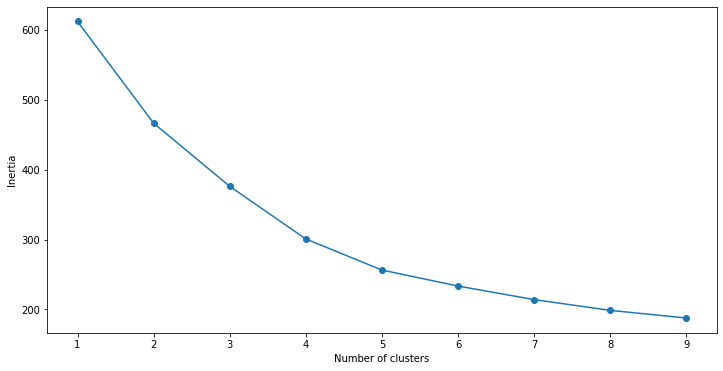

In [67]:
# creating kmeans function (loop to determine optimum clusters #)
list = []
for cluster in range(1, 10):
    kmeans = KMeans(n_clusters = cluster, init = 'k-means++')
    kmeans.fit(scaled_hatecrime)
    list.append(kmeans.inertia_) # inertia on scaled data to use to determine optimum # of clusters

# plotting elbow curve to choose clusters
frame = pd.DataFrame({'Cluster':range(1,10), 'list':list})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['list'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [68]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_hatecrime)
pred_cluster = kmeans.predict(scaled_hatecrime)

In [69]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(scaled_hatecrime)
 
print(label)

[3 1 2 3 2 1 1 1 4 2 2 1 0 2 0 5 0 3 3 5 1 1 0 1 3 0 5 5 2 5 1 2 2 0 5 0 0
 1 0 2 0 5 3 2 5 5 1 1 3 5 5]


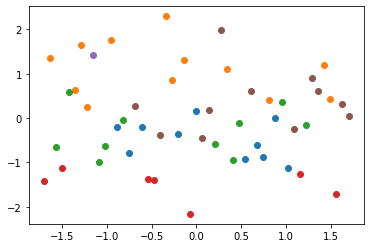

In [70]:
# Getting unique labels
 
u_labels = np.unique(label)
 
#plotting results:
 
for i in u_labels:
    plt.scatter(scaled_hatecrime[label == i , 0] , scaled_hatecrime[label == i , 1] , label = i)
plt.show()

Text(0, 0.5, '# of Hate Crimes')

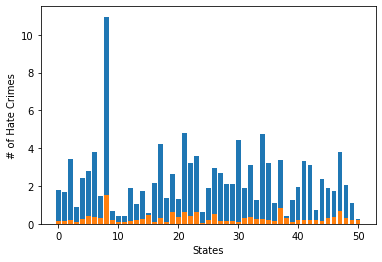

In [71]:
# plotting state compared to hate crimes before and after 2016 election

labels_splc = hatecrime["hate_crimes_per_100k_splc"]
labels_nature = hatecrime["avg_hatecrimes_per_100k_fbi"]

plt.bar(hatecrime["state"], labels_nature)
plt.xlabel("States")
plt.ylabel("# of Hate Crimes after 2016 election")


plt.bar(hatecrime["state"], labels_splc)
plt.xlabel("States")
plt.ylabel("# of Hate Crimes")


Analysis:

I used the KMeans Clustering method to group the hate crimes committed by state. And I used the elbow method to figure out how many clusters were optimal for this model. I found that I could use between 4-6 clusters so I chose 6. I predicted the labels and plotted them according to those clusters, however, I'm still unsure on how to interpret these predictions and how to tell how the number of clusters corresponds to the distribution of hate crimes across states.

I created a visualization of hate crimes that occurred before and after the 2016 election to provide better insight to the question that I could answer using clustering. The bars in blue are the number of hate crimes that occurred before the 2016 election while the bars in red are the number of hate crimes that occurred after the 2016 election. From this, we can see that there are a number of states who have about the same number of hate crimes ranging around the 3 mark on the y-axis. 

Resources used through out this Practical:


(1) https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/#:~:text=2)%20Non%2DLinear%20Activation%20Functions,to%20differentiate%20between%20the%20outcomes. (for SVM model section)

(2) https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html (for Neural Networks model)

(3) https://vitalflux.com/svm-rbf-kernel-parameters-code-sample/#:~:text=The%20gamma%20parameter%20defines%20how,the%20higher%20values%20of%20gamma. (for SVM model)

(4) https://quantdare.com/decision-trees-gini-vs-entropy/ (for Random Forest model)

(5) https://www.analyticsvidhya.com/blog/2021/04/gradient-descent-in-linear-regression/#:~:text=Gradient%20Descent%20is%20an%20algorithm,a%20smaller%20number%20of%20iterations.&text=For%20some%20combination%20of%20m,us%20our%20best%20fit%20line. (for insight on Gradient Descent)

(6) https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#:~:text=Intuitively%2C%20the%20gamma%20parameter%20defines,the%20model%20as%20support%20vectors. (for SVM model)

